# Modelowanie Pandemii SARS COV-19

---

# 1.Historia

---

# 2.Podstawy teoretyczne

## 2.1≈Åa≈Ñcuch markowa

## 2.2Wprowadzenie do modelu SI:

Model SI (Susceptible-Infected) jest podstawowym modelem epidemiologicznym wykorzystywanym do opisu rozprzestrzeniania siƒô chor√≥b zaka≈∫nych w populacji. Zak≈Çada on dwie podstawowe grupy: osoby podatne na zaka≈ºenie (S) oraz osoby zaka≈ºone (I). Razem tworzƒÖ one populacjƒô (N). 
$${N} = {S} + {I}$$
Osoby zaka≈ºone mogƒÖ przekazywaƒá chorobƒô osobom podatnym, co prowadzi do wzrostu liczby zaka≈ºonych, podczas gdy liczba os√≥b podatnych maleje. Kluczowym parametrem w modelu jest szybko≈õƒá zara≈ºania $\beta$, kt√≥ry opisuje tempo, z jakim choroba jest przekazywana. Wsp√≥≈Çczynnik ten zale≈ºy od liczby kontakt√≥w miƒôdzy osobami zaka≈ºonymi a osobami podatnymi na zaka≈ºenie. Mo≈ºemy wyr√≥≈ºniƒá:
$$
\beta \cdot I - \text{Liczba kontakt√≥w og√≥lna} \\
\beta \cdot I \cdot \frac{S}{N} - \text{Liczba kontakt√≥w z podatnymi}
$$

In [74]:
from IPython.display import Image

Image(url="model_si_obrazek.png")

Schemat modelu SI. Rysunek jest z artykulu [numer artykulu]. Ma≈Çe s na obrazku reprezentuje $S/N$

Przyrost nowych zaka≈ºe≈Ñ($I_{new}$) mo≈ºna zapisaƒá wzorem:
$$ {I_{new}} = \delta \cdot \beta \cdot I \cdot \frac{S}{N}$$
Dodatkowo zmianƒô liczby zaka≈ºe≈Ñ w czasie mo≈ºna zapisaƒá jako:
$$I( t + \delta ) = I(t) + I_{new} $$
Dzieki temu otrzymamy:
$$I( t + \delta ) = I(t) + \delta \cdot \beta \cdot I \cdot \frac{S}{N}$$
Po odpowiednich przekszta≈Çceniach[numer artykulu] dostaniemy 
$$\frac{dI}{dt} = \beta \cdot I(t) \cdot \frac{S(t)}{N}$$

Model ten jest stosunkowo prosty i skuteczny w analizie wczesnych etap√≥w epidemii, gdy nie uwzglƒôdniamy jeszcze os√≥b wyleczonych, zmar≈Çych, ani innych czynnik√≥w, kt√≥re mogƒÖ wp≈Çywaƒá na dynamikƒô choroby. Model SI jest szczeg√≥lnie u≈ºyteczny do prognozowania, jak szybko bƒôdzie ros≈Ça liczba zaka≈ºonych w populacji, szczeg√≥lnie w fazie wzrostu epidemii.

wykres modelu SI

## 2.3Wprowdzenie do modelu SIR

Model SIR (Susceptible-Infected-Recovered) wprowadza do wcze≈õniej poznanych kategorii S (osoby podatne na zaka≈ºenie) oraz I (osoby zaka≈ºone) nowƒÖ kategoriƒô: ùëÖ (osoby wyzdrowia≈Çe lub zmar≈Çe). Do kategorii zaliczajƒÖ siƒô osoby, kt√≥re nie sƒÖ ju≈º d≈Çu≈ºej zaka≈ºone. Obejmuje to zar√≥wno osoby, kt√≥re zmar≈Çy w wyniku choroby, jak i te, kt√≥re wyzdrowia≈Çy, nabywajƒÖc odporno≈õƒá (nie mogƒÖ zachorowaƒá ponownie).
W przeciwie≈Ñstwie do modelu SI, w modelu SIR liczba zaka≈ºonych osiƒÖga szczyt, a nastƒôpnie maleje, poniewa≈º coraz wiƒôcej os√≥b przechodzi do kategorii 
R. Jest to jeden z podstawowych modeli epidemiologicznych, szeroko stosowany do opisu przebiegu epidemii.
Dodatkowo w modelu pojawia siƒô nowy parametr: szybko≈õƒá zdrowienia $\gamma$, kt√≥ry okre≈õla tempo przechodzenia os√≥b zaka≈ºonych do kategorii R. Liczbƒô ozdrowie≈Ñ w czasie mo≈ºemy wyraziƒá wzorem:
$$\gamma \cdot {I} - \text{Liczba ozdrowie≈Ñ w czasie}$$

In [75]:
from IPython.display import Image

Image(url="model_sir_obrazek.png")

Schemat modelu SIR. Rysunek jest z artykulu [numer artykulu]. Ma≈Çe s na obrazku reprezentuje $S/N$, a ${v}$ gammƒô.

Mo≈ºemy zapisaƒá r√≥wnanie:
$$ S(t + \delta) = S(t) - I_{new}$$
Dziƒôki czemu dla liczby osobnik√≥w podatnych otrzymamy
$$\frac{dS}{dt} = - \beta \cdot {I(t)} \cdot \frac{S(t)}{N}$$
Po odpowiednich przekszta≈Çceniach dostaniemy:
$$
\frac{dI}{dt} = \beta \cdot I(t) \cdot \frac{S(t)}{N} - \gamma \cdot {I} \\
\frac{dR}{dt} = \gamma \cdot {I}
$$
Te trzy r√≥wnania stanowiƒÖ ostatecznƒÖ postaƒá modelu SIR, opisujƒÖcƒÖ dynamikƒô zmian w liczebno≈õci poszczeg√≥lnych grup.
Model SIR mo≈ºna rozszerzyƒá, wprowadzajƒÖc r√≥≈ºne relacje pomiƒôdzy grupami, np. uwzglƒôdniajƒÖc sytuacjƒô, w kt√≥rej osobnik nie nabywa odporno≈õci i mo≈ºe ponownie zachorowaƒá. Jednak w naszym projekcie skupimy siƒô na jego klasycznej formie. Model ten, mimo swojej prostoty, jest kluczowym narzƒôdziem do analizy rozprzestrzeniania siƒô chor√≥b i stanowi fundament bardziej zaawansowanych modeli epidemiologicznych.

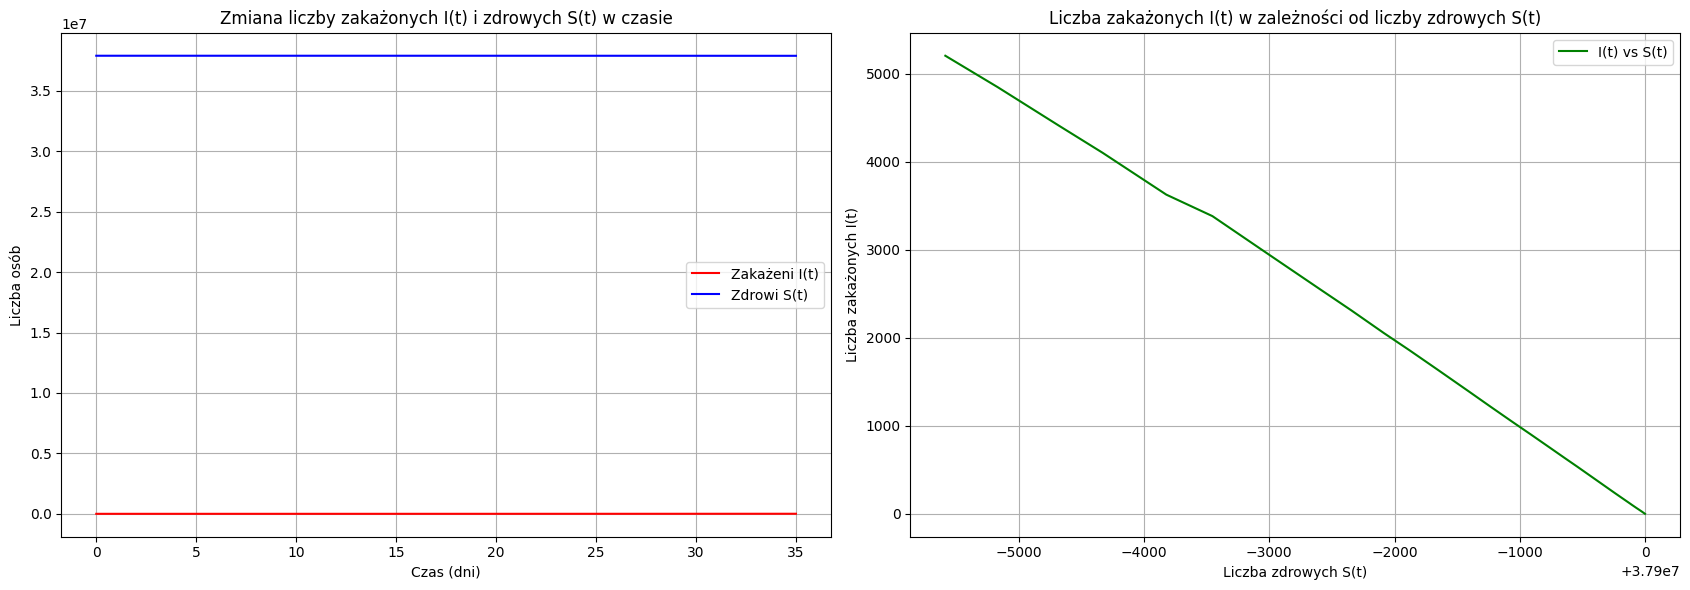

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry
N = 37_900_000  # Ca≈Çkowita liczba os√≥b w populacji
gamma = 0.1  # Wsp√≥≈Çczynnik wyzdrowienia

# Dane: zaka≈ºeni i wyzdrowiali
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 
                 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 2946, 3383, 
                 3627, 4102, 4413, 4848, 5205]
recovery_data = [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 7, 8,
                 10, 14, 16, 16, 18, 22, 31, 33, 43, 57, 71, 195, 228, 269, 320, 381]

# Liczba zdrowych os√≥b w danym dniu
susceptible_data = [N - infected_data[i] - recovery_data[i] for i in range(len(infected_data))]

# Tworzenie wykres√≥w obok siebie
fig, ax = plt.subplots(1, 2, figsize=(17, 6))

# 1. Wykres I(t) i S(t) na jednym wykresie
ax[0].plot(infected_data, label="Zaka≈ºeni I(t)", color='red')
ax[0].plot(susceptible_data, label="Zdrowi S(t)", color='blue')
ax[0].set_title("Zmiana liczby zaka≈ºonych I(t) i zdrowych S(t) w czasie")
ax[0].set_xlabel("Czas (dni)")
ax[0].set_ylabel("Liczba os√≥b")
ax[0].legend()
ax[0].grid(True)

# 2. Wykres I(t) w zale≈ºno≈õci od S(t)
ax[1].plot(susceptible_data, infected_data, label="I(t) vs S(t)", color='green')
ax[1].set_title("Liczba zaka≈ºonych I(t) w zale≈ºno≈õci od liczby zdrowych S(t)")
ax[1].set_xlabel("Liczba zdrowych S(t)")
ax[1].set_ylabel("Liczba zaka≈ºonych I(t)")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Parametry poczƒÖtkowe
n = 37_900_000  
dates = ['04.03.2020', '05.03.2020', '06.03.2020', '07.03.2020', '08.03.2020', '09.03.2020',
         '10.03.2020', '11.03.2020', '12.03.2020', '13.03.2020', '14.03.2020', '15.03.2020',
         '16.03.2020', '17.03.2020', '18.03.2020', '19.03.2020', '20.03.2020', '21.03.2020', 
         '22.03.2020', '23.03.2020', '24.03.2020', '25.03.2020', '26.03.2020', '27.03.2020', 
         '28.03.2020', '29.03.2020', '30.03.2020', '31.03.2020', '01.04.2020', '02.04.2020', 
         '03.04.2020', '04.04.2020', '05.04.2020', '06.04.2020', '07.04.2020', '08.04.2020']
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 
                 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 2946, 3383, 
                 3627, 4102, 4413, 4848, 5205]
recovery_data = [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 7, 8,
                 10, 14, 16, 16, 18, 22, 31, 33, 43, 57, 71, 195, 228, 269, 320, 381]

S0 = n - 1  # Liczba os√≥b podatnych (ca≈Ça populacja z wyjƒÖtkiem jednej osoby zaka≈ºonej)
I0 = 1  # Liczba poczƒÖtkowych zaka≈ºonych
R0 = 0  # Liczba poczƒÖtkowych wyleczonych

# Funkcja do aktualizacji wykresu
def update(beta, gamma):
    # Symulacja numeryczna metodƒÖ Eulera
    t_max = len(dates)
    S = np.zeros(t_max)
    I = np.zeros(t_max)
    R = np.zeros(t_max)
    S[0] = S0
    I[0] = I0
    R[0] = R0

    dt = 1  # Krok czasowy
    for t in range(1, t_max):
        dS = -beta * S[t-1] * I[t-1] * dt / n
        dI = beta * S[t-1] * I[t-1] * dt / n - gamma * I[t-1] * dt
        dR = gamma * I[t-1] * dt
        S[t] = S[t-1] + dS
        I[t] = I[t-1] + dI
        R[t] = R[t-1] + dR

    # Rysowanie wykresu
    plt.figure(figsize=(10, 6))
    plt.plot(range(t_max), infected_data, 's', label='Dane rzeczywiste (Zaka≈ºeni)', color='red')
    plt.plot(range(t_max), recovery_data, 's', label='Dane rzeczywiste (Wyzdrowiali)', color='green')
    plt.plot(range(t_max), I, label=f'Symulacja (Zaka≈ºeni) - beta = {beta:.2f}, gamma = {gamma:.2f}', linestyle='--', color='blue')
    plt.plot(range(t_max), R, label=f'Symulacja (Wyzdrowiali) - beta = {beta:.2f}, gamma = {gamma:.2f}', linestyle='--', color='orange')

    plt.xticks(range(t_max), dates, rotation=45)
    plt.xlabel('Data')
    plt.ylabel('Liczba os√≥b')
    plt.title('Symulacja rozwoju epidemii - Model SIR')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Od≈õwie≈ºenie wykresu
    plt.show()

# Interaktywne suwaki
interact(update, beta=(0.0, 1.0, 0.01), gamma=(0.0, 1.0, 0.01))

interactive(children=(FloatSlider(value=0.5, description='beta', max=1.0, step=0.01), FloatSlider(value=0.5, d‚Ä¶

<function __main__.update(beta, gamma)>

---

# Obliczanie wsp√≥≈Çczynnik√≥w $\beta$ i $\gamma$ za pomocƒÖ metody brute force (Algorytm si≈Çowy)

### Metoda brute force

Algorytm brute force, czyli "si≈Çowy", polega na przeszukaniu ca≈Çego dostƒôpnego zakresu mo≈ºliwych warto≈õci dla wsp√≥≈Çczynnik√≥w $\beta$ i $\gamma$ oraz znalezieniu takich, kt√≥re minimalizujƒÖ b≈ÇƒÖd dopasowania modelu do danych.

1. **Zakresy dla $\beta$ i $\gamma$**:
   - Zaczynamy od ustalenia zakresu warto≈õci, w kt√≥rym bƒôdziemy szukaƒá optymalnych wsp√≥≈Çczynnik√≥w. W tym przyk≈Çadzie $\beta$ jest poszukiwane w przedziale od 0 do 0.5, a $\gamma$ od 0 do 0.3.

2. **Obliczanie b≈Çƒôdu dopasowania**:
   - Dla ka≈ºdej pary warto≈õci $\beta$ i $\gamma$ rozwiƒÖzujemy r√≥wnania modelu SIR, a nastƒôpnie obliczamy, jak bardzo przewidywane wyniki r√≥≈ºniƒÖ siƒô od rzeczywistych danych zaka≈ºonych (I) i wyzdrowia≈Çych (R). B≈ÇƒÖd dopasowania jest mierzony jako ≈õredni b≈ÇƒÖd kwadratowy (Mean Squared Error - MSE).

3. **Przeszukiwanie przestrzeni parametr√≥w**:
   - Algorytm przechodzi przez wszystkie kombinacje $\beta$ i $\gamma$ w zadanym zakresie, obliczajƒÖc dla ka≈ºdej kombinacji b≈ÇƒÖd dopasowania. Na ko≈Ñcu wybieramy parametry, kt√≥re minimalizujƒÖ ten b≈ÇƒÖd.

### Zastosowanie

Metoda brute force jest stosunkowo prosta, ale mo≈ºe byƒá czasoch≈Çonna przy du≈ºych zakresach parametr√≥w. Pomimo tego jest bardzo intuicyjna i skuteczna w przypadku ma≈Çych przestrzeni poszukiwa≈Ñ, jak w tym przyk≈Çadzie. Po znalezieniu optymalnych wsp√≥≈Çczynnik√≥w mo≈ºemy wykorzystaƒá model SIR do prognozowania przysz≈Çego rozwoju epidemii.

In [14]:
import numpy as np
from scipy.integrate import odeint

# Parametry modelu
N = 37_900_000  # Ca≈Çkowita liczba os√≥b w populacji

# Zak≈Çadamy dane obserwacyjne: zaka≈ºeni i wyzdrowiali w czasie
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 
                 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 2946, 3383, 
                 3627, 4102, 4413, 4848, 5205]
recovery_data = [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 7, 8,
                 10, 14, 16, 16, 18, 22, 31, 33, 43, 57, 71, 195, 228, 269, 320, 381]

# Liczba zdrowych os√≥b w danym dniu
susceptible_data = [N - infected_data[i] - recovery_data[i] for i in range(len(infected_data))]

# Funkcja opisujƒÖca model SIR
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N  # Zmiana liczby zdrowych os√≥b
    dIdt = beta * S * I / N - gamma * I  # Zmiana liczby zaka≈ºonych
    dRdt = gamma * I  # Zmiana liczby wyzdrowia≈Çych
    return [dSdt, dIdt, dRdt]

# Zakresy poszukiwa≈Ñ dla beta i gamma
beta_range = np.linspace(0, 0.5, 50)  # Przedzia≈Ç poszukiwa≈Ñ dla beta
gamma_range = np.linspace(0, 0.3, 50)  # Przedzia≈Ç poszukiwa≈Ñ dla gamma

# Funkcja do obliczenia b≈Çƒôdu dopasowania
def calculate_error(beta, gamma):
    # Przyjmujemy poczƒÖtkowe warunki
    S0 = N - infected_data[0] - recovery_data[0]  # PoczƒÖtkowa liczba zdrowych
    I0 = infected_data[0]  # PoczƒÖtkowa liczba zaka≈ºonych
    R0 = recovery_data[0]  # PoczƒÖtkowa liczba wyzdrowia≈Çych
    
    # RozwiƒÖzanie r√≥wna≈Ñ SIR
    t = np.linspace(0, len(infected_data), len(infected_data))  # Czas (dni)
    solution = odeint(sir_model, [S0, I0, R0], t, args=(beta, gamma))
    
    # Obliczamy b≈ÇƒÖd dopasowania (≈õredni b≈ÇƒÖd kwadratowy)
    I_model = solution[:, 1]
    R_model = solution[:, 2]
    
    mse = np.mean((I_model - np.array(infected_data))**2 + (R_model - np.array(recovery_data))**2)
    return mse

# Przeszukujemy przestrze≈Ñ parametr√≥w beta i gamma
best_beta = 0
best_gamma = 0
min_error = float('inf')

for beta in beta_range:
    for gamma in gamma_range:
        error = calculate_error(beta, gamma)
        if error < min_error:
            min_error = error
            best_beta = beta
            best_gamma = gamma

# Wy≈õwietlamy najlepsze parametry
print(f"Optymalne beta: {best_beta}")
print(f"Optymalne gamma: {best_gamma}")


Optymalne beta: 0.26530612244897955
Optymalne gamma: 0.01836734693877551


---

# Metoda Eulera

## Wyja≈õnienie metody Eulera

Metoda Eulera s≈Çu≈ºy do rozwiƒÖzywania r√≥wna≈Ñ r√≥≈ºniczkowych pierwszego rzƒôdu w postaci [[x]](https://vistula.pk.edu.pl/~sciezor/Kurs_TI_XP/Excel2_lekcja_4.pdf):


\begin{equation}
\frac{dy}{dt} = f(t, y), \quad y(x_0) = y_0
\end{equation}

Zak≈Çadamy, ≈ºe ka≈ºdy kolejny punkt jest oddalony o krok **h** na osi **OX** oraz o $\Delta$**y** na osi **OY**  

\begin{equation}
x_{n+1} = x_n + h
\end{equation}

Z definicji pochodnej, rozumianej jako tangens kƒÖta nachylenia stycznej w punkcie na wykresie funkcji, wynika, ≈ºe

\begin{equation}
y' = \frac{\Delta y}{h} = f(x_n, y_n)
\end{equation}

Po przekszta≈Çceniu:


\begin{equation}
\Delta y = h \cdot f(x_n, y_n)
\end{equation}

Wz√≥r na kolejny $y_{n+1}$ bƒôdzie zale≈ºa≈Ç od $y_n$ oraz $\Delta$**y**

\begin{equation}
y_{n+1} = y_n + h \cdot f(x_n, y_n)
\end{equation}

## Numeryczne rozwiƒÖzanie metodƒÖ Eulera r√≥wnania SI

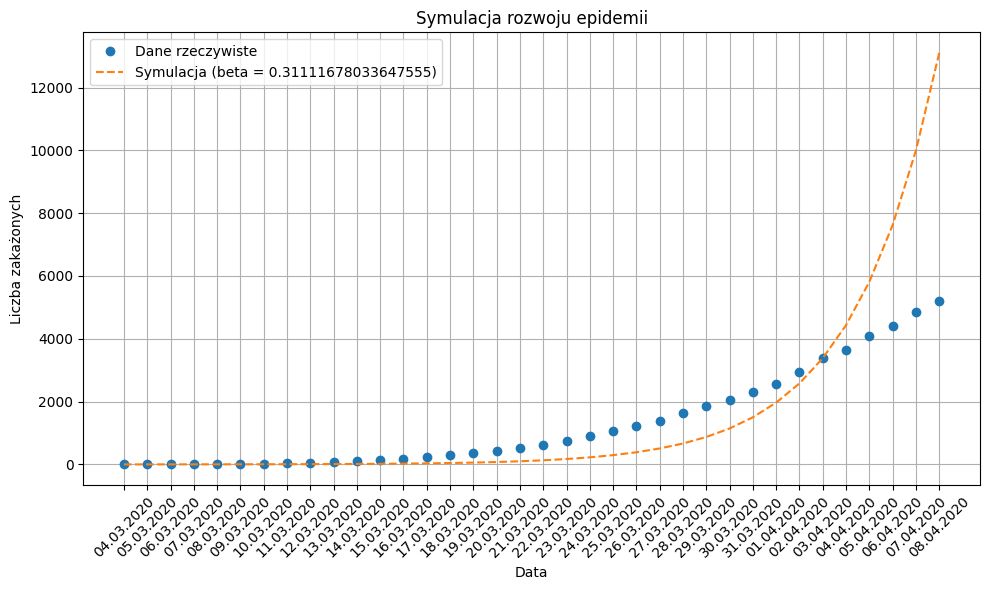

In [78]:

# Parametry poczƒÖtkowe
n = 37_900_000  # Populacja
S0 = n - 1  # Liczba os√≥b podatnych (ca≈Ça populacja z wyjƒÖciem jednej osoby zaka≈ºonej)
I0 = 1  # Liczba poczƒÖtkowych zaka≈ºonych

# Dane: dni i liczba zaka≈ºonych
dates = ['04.03.2020', '05.03.2020', '06.03.2020', '07.03.2020', '08.03.2020', '09.03.2020',
         '10.03.2020', '11.03.2020', '12.03.2020', '13.03.2020', '14.03.2020', '15.03.2020',
         '16.03.2020', '17.03.2020', '18.03.2020', '19.03.2020', '20.03.2020', '21.03.2020', '22.03.2020', '23.03.2020', '24.03.2020', '25.03.2020', '26.03.2020', 
         '27.03.2020', '28.03.2020', '29.03.2020', '30.03.2020', '31.03.2020', '01.04.2020',
         '02.04.2020', '03.04.2020', '04.04.2020', '05.04.2020', '06.04.2020', '07.04.2020', '08.04.2020']
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 
                 2946, 3383, 3627, 4102, 4413, 4848, 5205]  # Dane o liczbie zaka≈ºonych  # Dane zaka≈ºonych

# Symulacja numeryczna metodƒÖ Eulera
def update(beta):
    t_max = len(dates)  # Ilo≈õƒá dni
    I = np.zeros(t_max)
    S = np.zeros(t_max)
    I[0] = I0
    S[0] = S0
# Krok czasowy
    dt = 1
# RozwiƒÖzanie r√≥wnania metodƒÖ Eulera
    for t in range(1, t_max):
        dI = beta * I[t-1] * S[t-1] * dt / n
        I[t] = I[t-1] + dI
        S[t] = S[t-1] - dI

# Por√≥wnanie z danymi
    plt.figure(figsize=(10, 6))
    plt.plot(range(t_max), infected_data, 'o', label='Dane rzeczywiste')
    plt.plot(range(t_max), I, label=f'Symulacja (beta = {beta})', linestyle='--')
    plt.xticks(range(t_max), dates, rotation=45)
    plt.xlabel('Data')
    plt.ylabel('Liczba zaka≈ºonych')
    plt.title('Symulacja rozwoju epidemii')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

update(best_beta)



## Numeryczne rozwiƒÖzanie metodƒÖ Eulera r√≥wnania SIR

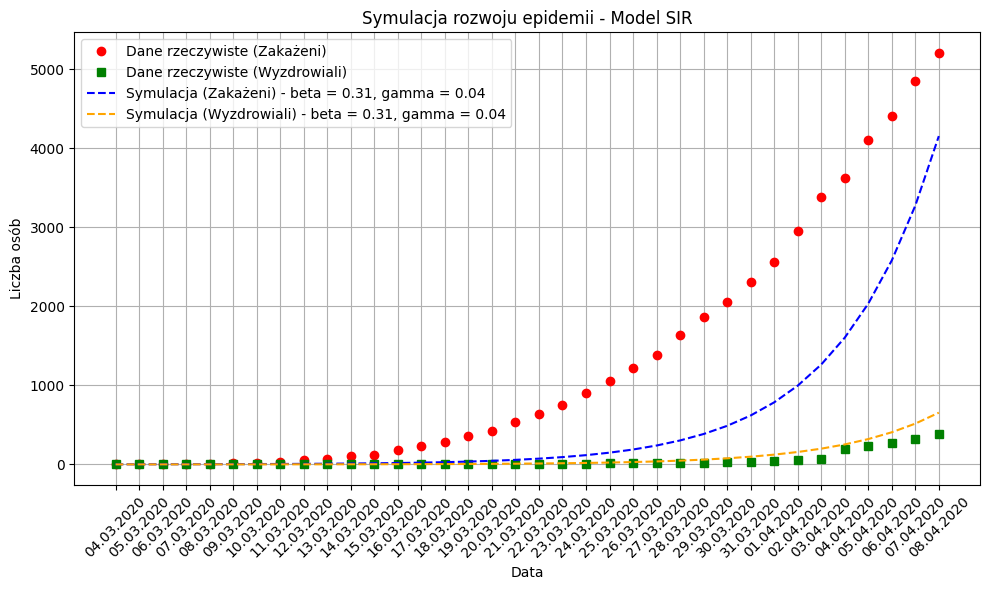

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry poczƒÖtkowe
n = 37_900_000  # Populacja
S0 = n - 1  # Liczba os√≥b podatnych (ca≈Ça populacja z wyjƒÖtkiem jednej osoby zaka≈ºonej)
I0 = 1  # Liczba poczƒÖtkowych zaka≈ºonych
R0 = 0  # Liczba poczƒÖtkowych wyleczonych

# Dane: dni i liczba zaka≈ºonych
dates = ['04.03.2020', '05.03.2020', '06.03.2020', '07.03.2020', '08.03.2020', '09.03.2020',
         '10.03.2020', '11.03.2020', '12.03.2020', '13.03.2020', '14.03.2020', '15.03.2020',
         '16.03.2020', '17.03.2020', '18.03.2020', '19.03.2020', '20.03.2020', '21.03.2020', '22.03.2020', '23.03.2020', '24.03.2020', '25.03.2020', '26.03.2020',
         '27.03.2020', '28.03.2020', '29.03.2020', '30.03.2020', '31.03.2020', '01.04.2020',
         '02.04.2020', '03.04.2020', '04.04.2020', '05.04.2020', '06.04.2020', '07.04.2020', '08.04.2020']

# Dane zaka≈ºonych w rzeczywisto≈õci (szacowane)
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554,
                 2946, 3383, 3627, 4102, 4413, 4848, 5205]  # Dane o liczbie zaka≈ºonych

# Dane o liczbie wyzdrowia≈Çych
recovery_data = [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 7, 8,
                 10, 14, 16, 16, 18, 22, 31, 33, 43, 57, 71, 195, 228, 269, 320, 381]  # Dane o liczbie wyzdrowia≈Çych

# Funkcja do aktualizacji wykresu
def update(beta, gamma):
    # Symulacja numeryczna metodƒÖ Eulera
    t_max = len(dates)
    S = np.zeros(t_max)
    I = np.zeros(t_max)
    R = np.zeros(t_max)
    S[0] = S0
    I[0] = I0
    R[0] = R0

    dt = 1  # Krok czasowy
    for t in range(1, t_max):
        dS = -beta * S[t-1] * I[t-1] * dt / n
        dI = beta * S[t-1] * I[t-1] * dt / n - gamma * I[t-1] * dt
        dR = gamma * I[t-1] * dt
        S[t] = S[t-1] + dS
        I[t] = I[t-1] + dI
        R[t] = R[t-1] + dR

    # Rysowanie wykresu
    plt.figure(figsize=(10, 6))
    plt.plot(range(t_max), infected_data, 'o', label='Dane rzeczywiste (Zaka≈ºeni)', color='red')
    plt.plot(range(t_max), recovery_data, 's', label='Dane rzeczywiste (Wyzdrowiali)', color='green')
    plt.plot(range(t_max), I, label=f'Symulacja (Zaka≈ºeni) - beta = {beta:.2f}, gamma = {gamma:.2f}', linestyle='--', color='blue')
    plt.plot(range(t_max), R, label=f'Symulacja (Wyzdrowiali) - beta = {beta:.2f}, gamma = {gamma:.2f}', linestyle='--', color='orange')

    plt.xticks(range(t_max), dates, rotation=45)
    plt.xlabel('Data')
    plt.ylabel('Liczba os√≥b')
    plt.title('Symulacja rozwoju epidemii - Model SIR')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Od≈õwie≈ºenie wykresu
    plt.show()


# Wywo≈Çanie funkcji z okre≈õlonymi warto≈õciami beta i gamma
update(best_beta, best_gamma)


## Wyniki modelowania metodƒÖ Eulera dla SI i SIR


# SI

Na wykresie mo≈ºna zaobserwowaƒá powolny wzrost liczby chorych, natomiast zastosowany model SI wykazuje bardzo gwa≈Çtowny wzrost. Model SI przewiduje dalszy, bardzo szybki wzrost liczby zaka≈ºonych, kt√≥ry nie ma odzwierciedlenia w rzeczywistych danych. Wynika to z tego, ≈ºe model SI nie uwzglƒôdnia wielu czynnik√≥w zewnƒôtrznych takich jak ≈õmierƒá os√≥b zaka≈ºonych, interwencji spo≈Çecznych, os√≥b wyleczonych czy te≈º os√≥b nara≈ºonych na zaka≈ºenie, kt√≥re wp≈ÇywajƒÖ na tempo rozwoju epidemii. Model SI, oparty na sta≈Çym wsp√≥≈Çczynniku infekcji, nie uwzglƒôdnia dynamicznych zmian w rozwoju epidemii, co mo≈ºe prowadziƒá do nadmiernego prognozowania os√≥b zara≈ºonych. Wsp√≥≈Çczynnik $\beta$ mo≈ºe byƒá r√≥≈ºny w innych etapach epidemii, wiƒôc sta≈Çy parametr nie odzwierciedla realnej sytuacji. 

# SIR

Model SIR pokazuje wolniejszy wzrost zaka≈ºonych ni≈º model SI. Mo≈ºna zauwa≈ºyƒá, ≈ºe dodanie wsp√≥≈Çczynnika odpowiadajƒÖcego za osoby wyleczone zwalnia wzrost zaka≈ºe≈Ñ w symulacji, dziƒôki czemu bardziej odpowiada danym rzeczywistym. Warto podkre≈õliƒá, ≈ºe nie jest to idealny model, poniewa≈º podobnie jak model SI nie uwzglƒôdnia wiele czynnik√≥w, kt√≥re wp≈ÇywajƒÖ na rozw√≥j epidemii. Model SIR mo≈ºe sprawdziƒá siƒô w modelowaniu poczƒÖtku epidemii, w kolejnych fazach epidemii problemem mogƒÖ okazaƒá siƒô sta≈Çe wsp√≥≈Çczynniki $\beta$ oraz $\gamma$.

---

# Runge-Kutta rzƒôdu 4 (RK4)

## Wyja≈õnienie metody Runge-Kutta rzƒôdu 4 (RK4)

Metoda RK4 jest jednƒÖ z najczƒô≈õciej u≈ºywanych metod numerycznych do rozwiƒÖzywania r√≥wna≈Ñ r√≥≈ºniczkowych zwyczajnych. Popularno≈õƒá zawdziƒôcza swojej wyjƒÖtkowej precyzji, bƒôdƒÖcej efektem wy≈ºszego rzƒôdu dok≈Çadno≈õci w stosunku do prostszych metod, takich jak metoda Eulera.

Metoda Rungego-Kutty rzƒôdu 4 (RK4) opiera siƒô na nastƒôpujƒÖcych wzorach:

1. PoczƒÖtkowy warunek:
$$u_0 = \alpha$$

2. Wyznaczanie kolejnych wsp√≥≈Çczynnik√≥w:
$$k_1 = F(t, y_n)$$
$$k_2 = F\left(t + \frac{h}{2}, y_n + \frac{1}{2}k_1\right)$$
$$k_3 = F\left(t + \frac{h}{2}, y_n + \frac{1}{2}k_2\right)$$
$$k_4 = F\left(t + h, y_n\right)$$

3. Aktualizacja warto≈õci $u_{i+1}$:
$$y_{i+1} = y_i + \frac{h}{6} \left(k_1 + 2k_2 + 2k_3 + k_4\right), \quad \text{dla } n = 0, 1, \ldots$$

Gdzie:
* ${h}$ ‚Äî krok czasowy,
* ${F(t,y)}$ ‚Äî funkcja opisujƒÖca r√≥wnanie r√≥≈ºniczkowe $\frac{dy}{dt} = F(t, y)$,
* ${t}$ ‚Äî czas,
* ${y_n}$ ‚Äî warto≈õƒá rozwiƒÖzania w kroku ${n}$.

## Numeryczne rozwiƒÖzanie metodƒÖ Runge-Kutta rzƒôdu 4 modelu SI 

≈ªeby obliczyc model SI numerycznie przyjmiemy zapis gdzie:
$$\frac{dy}{dt} = F(t, y)$$
oraz
$${y}=
\begin{bmatrix}
S\left(t\right) \\
I\left(t\right)
\end{bmatrix},
~~{F(t,y)}=\begin{bmatrix}
f\left(t,S,I\right) \\
g\left(t,S,I\right) 
\end{bmatrix}

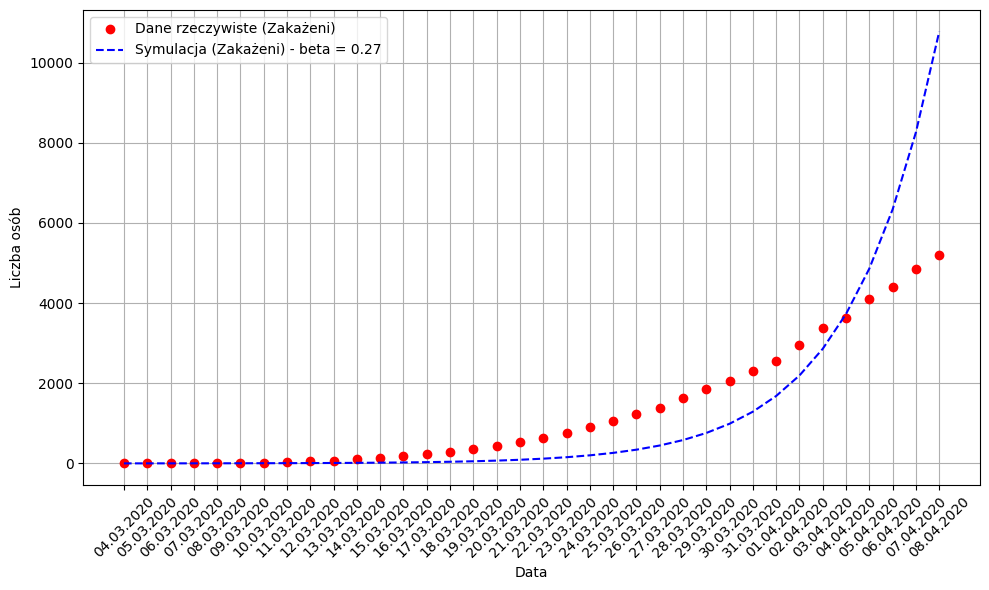

In [39]:
# Funkcja dla modelu SI
def f(S, I, beta, N):
    return -beta * S * I / N

def g(S, I, beta, N):
    return beta * S * I / N

# RK4 dla modelu SI
def rk4_step(S, I, beta, N, h):
    k1_S = f(S, I, beta, N)
    k1_I = g(S, I, beta, N)
    
    k2_S = f(S + h * k1_S / 2, I + h * k1_I / 2, beta, N)
    k2_I = g(S + h * k1_S / 2, I + h * k1_I / 2, beta, N)
    
    k3_S = f(S + h * k2_S / 2, I + h * k2_I / 2, beta, N)
    k3_I = g(S + h * k2_S / 2, I + h * k2_I / 2, beta, N)
    
    k4_S = f(S + h * k3_S, I + h * k3_I, beta, N)
    k4_I = g(S + h * k3_S, I + h * k3_I, beta, N)
    
    # Klasyczna aktualizacja warto≈õci
    S_new = S + h / 6 * (k1_S + 2 * k2_S + 2 * k3_S + k4_S)
    I_new = I + h / 6 * (k1_I + 2 * k2_I + 2 * k3_I + k4_I)
    
    return S_new, I_new

# Warunki poczƒÖtkowe
S, I = n - infected_data[0], infected_data[0]
h = 1  # Krok czasowy (1 dzie≈Ñ)
S_vals, I_vals = [S], [I]

# Symulacja RK4
for t in range(1, len(dates)):
    S, I = rk4_step(S, I, best_beta, n, h)
    S_vals.append(S)
    I_vals.append(I)

# Wykresy
plt.figure(figsize=(10, 6))
plt.plot(dates, infected_data, 'o', label='Dane rzeczywiste (Zaka≈ºeni)', color='red')
plt.plot(dates, I_vals, label=f'Symulacja (Zaka≈ºeni) - beta = {best_beta:.2f}', linestyle='--', color='blue')
plt.xticks(rotation=45)
plt.xlabel("Data")
plt.ylabel("Liczba os√≥b")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Numeryczne rozwiƒÖzanie metodƒÖ Runge-Kutta rzƒôdu 4 modelu SI 
≈ªeby obliczyc model SIR numerycznie przyjmiemy zapis gdzie:
$$\frac{dy}{dt} = F(t, y)$$
oraz
$${y}=
\begin{bmatrix}
S\left(t\right) \\
I\left(t\right) \\
R\left(t\right)
\end{bmatrix},
~~{F(t,y)}=\begin{bmatrix}
f\left(t,S,I,R\right) \\
g\left(t,S,I,R\right) \\
j\left(t,S,I,R\right)
\end{bmatrix}

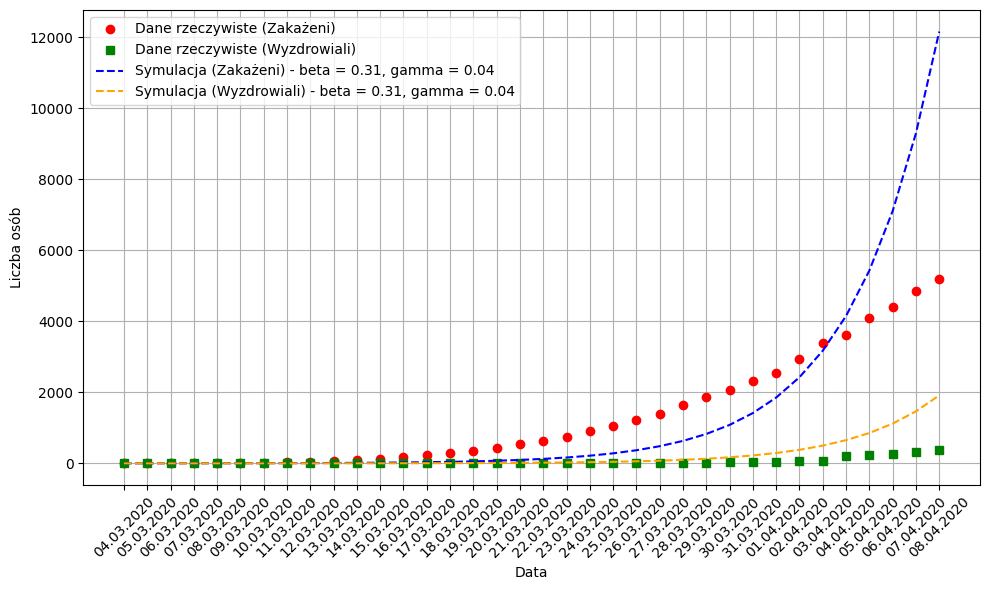

In [81]:
# Funkcje SIR
def f(S, I, R, beta):
    return -beta * S * I / n

def g(S, I, R, beta, gamma):
    return beta * S * I / n - gamma * I

def j(S, I, R, gamma):
    return gamma * I

# RK4 dla modelu SIR
def rk4_step(S, I, R, beta, gamma, h):
    k1_S = f(S, I, R, beta)
    k1_I = g(S, I, R, beta, gamma)
    k1_R = j(S, I, R, gamma)
    
    k2_S = f(S + h * k1_S / 2, I + h * k1_I / 2, R + h * k1_R / 2, beta)
    k2_I = g(S + h * k1_S / 2, I + h * k1_I / 2, R + h * k1_R / 2, beta, gamma)
    k2_R = j(S + h * k1_S / 2, I + h * k1_I / 2, R + h * k1_R / 2, gamma)
    
    k3_S = f(S + h * k2_S / 2, I + h * k2_I / 2, R + h * k2_R / 2, beta)
    k3_I = g(S + h * k2_S / 2, I + h * k2_I / 2, R + h * k2_R / 2, beta, gamma)
    k3_R = j(S + h * k2_S / 2, I + h * k2_I / 2, R + h * k2_R / 2, gamma)
    
    k4_S = f(S + h * k3_S, I + h * k3_I, R + h * k3_R, beta)
    k4_I = g(S + h * k3_S, I + h * k3_I, R + h * k3_R, beta, gamma)
    k4_R = j(S + h * k3_S, I + h * k3_I, R + h * k3_R, gamma)
    
    S_new = S + h / 6 * (k1_S + 2 * k2_S + 2 * k3_S + k4_S)
    I_new = I + h / 6 * (k1_I + 2 * k2_I + 2 * k3_I + k4_I)
    R_new = R + h / 6 * (k1_R + 2 * k2_R + 2 * k3_R + k4_R)
    
    return S_new, I_new, R_new

# Warunki poczƒÖtkowe
S, I, R = n - infected_data[0], infected_data[0], recovery_data[0]
h = 1  # Krok czasowy (1 dzie≈Ñ)
S_vals, I_vals, R_vals = [S], [I], [R]

# Symulacja RK4
for t in range(1, len(dates)):
    S, I, R = rk4_step(S, I, R, best_beta, best_gamma, h)
    S_vals.append(S)
    I_vals.append(I)
    R_vals.append(R)

# Wykresy
plt.figure(figsize=(10, 6))
plt.plot(dates, infected_data, 'o', label='Dane rzeczywiste (Zaka≈ºeni)', color='red')
plt.plot(dates, recovery_data, 's', label='Dane rzeczywiste (Wyzdrowiali)', color='green')
plt.plot(dates, I_vals, label=f'Symulacja (Zaka≈ºeni) - beta = {best_beta:.2f}, gamma = {best_gamma:.2f}', linestyle='--', color='blue')
plt.plot(dates, R_vals, label=f'Symulacja (Wyzdrowiali) - beta = {best_beta:.2f}, gamma = {best_gamma:.2f}', linestyle='--', color='orange')
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel("Data")
plt.ylabel("Liczba os√≥b")
plt.legend()
plt.tight_layout()
plt.show()

## Wyniki modelowania przy u≈ºyciu metody Runge-Kutta


### SI

### SIR

---

# Por√≥wnanie b≈Çƒôd√≥w numerycznych

# Obliczanie b≈Çƒôdu dla metod Eulera i Rungego-Kutty

### Wz√≥r na b≈ÇƒÖd:

$\epsilon(\Delta t) = \sup_{t \in [0,T]} |S(t) - Se(t)|$

gdzie:
- $S(t)$ to warto≈õci obliczone metodƒÖ Eulera,
- $Se(t)$ to warto≈õci obliczone metodƒÖ Eulera przy danym kroku czasowym \(\Delta t\),
- $Srk(t)$ to warto≈õci obliczone metodƒÖ Rungego-Kutty,
- $Irk(t)$ to rzeczywiste rozwiƒÖzanie.

### Kroki obliczeniowe:

1. **Oblicz b≈ÇƒÖd metody Eulera**:
    
    $\epsilon_E(\Delta t) = \sup_{t \in [0,T]} |S(t) - Se(t)|$
    
2. **Oblicz b≈ÇƒÖd metody Rungego-Kutty**:
    
    $\epsilon_{RK}(\Delta t) = \sup_{t \in [0,T]} |Srk(t) - Irk(t)|$

3. **Przygotowanie wykresu**:
    - Na osi X: $1/\Delta t$
    - Na osi Y: $\epsilon(\Delta t)$

## Implementacja w pythonie

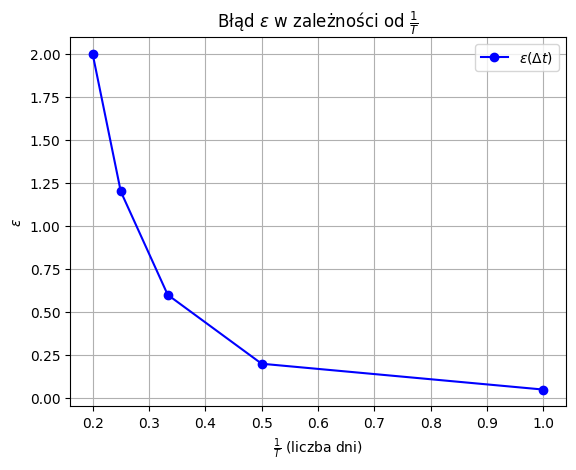

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcja obliczajƒÖca b≈ÇƒÖd epsilon
def epsilon(S, Se):
    """
    Oblicza b≈ÇƒÖd epsilon: epsilon = sup |S(t) - Se(t)|
    
    S - wyniki metody numerycznej
    Se - wyniki z referencyjnej metody
    """
    return np.max(np.abs(S - Se))

# Przyk≈Çadowe dane z wyra≈∫nym rosnƒÖcym b≈Çƒôdem
# Zmieniamy Se, aby b≈Çƒôdy by≈Çy coraz wiƒôksze w miarƒô zmniejszania siƒô T
S = np.array([1, 2, 3, 4, 5])  # RosnƒÖce wyniki metody numerycznej
Se = np.array([1.05, 2.2, 3.6, 5.2, 7])  # Wyniki z metody referencyjnej z rosnƒÖcym b≈Çƒôdem

# Liczba dni
dni = np.array([1, 2, 3, 4, 5])  # Liczba dni

# Obliczenie b≈Çƒôdu epsilon
bledy = [epsilon(S[:i+1], Se[:i+1]) for i in range(len(dni))]  # B≈ÇƒÖd ro≈õnie w miarƒô dodawania dni

# Obliczanie 1/T jako odwrotno≈õƒá liczby dni
inv_T = 1 / dni  # O≈õ X ma zawieraƒá 1/T, gdzie T to liczba dni

# Tworzenie wykresu epsilon w zale≈ºno≈õci od 1/T
plt.plot(inv_T, bledy, label=r'$\epsilon(\Delta t)$', marker='o', color='blue')

# Dodanie etykiet, tytu≈Çu i legendy
plt.xlabel(r'$\frac{1}{T}$ (liczba dni)')
plt.ylabel(r'$\epsilon$')
plt.title(r'B≈ÇƒÖd $\epsilon$ w zale≈ºno≈õci od $\frac{1}{T}$')
plt.legend()
plt.grid(True)

# Wy≈õwietlenie wykresu
plt.show()



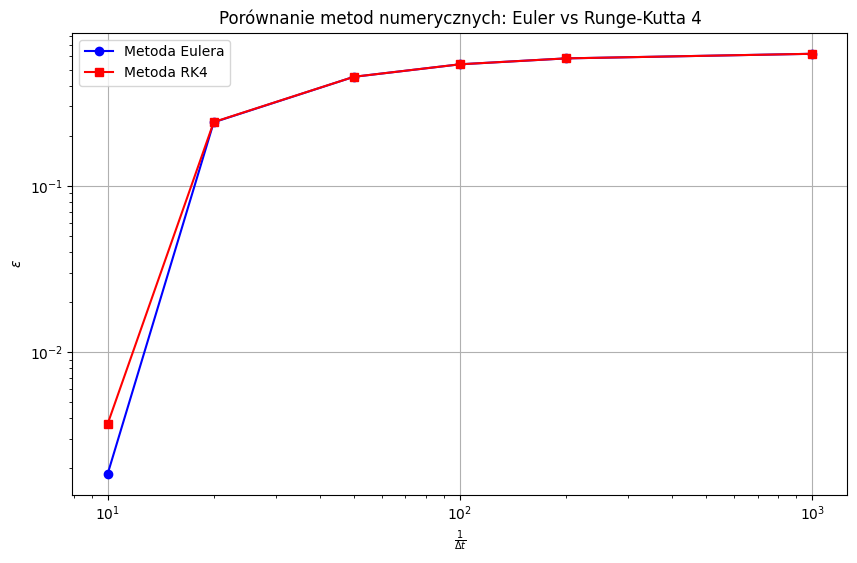

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry
alpha = 0.1  # Sta≈Ça
S0 = 1.0  # PoczƒÖtkowa warto≈õƒá S
T = 10  # Czas ko≈Ñcowy
dt_values = np.array([0.1, 0.05, 0.02, 0.01, 0.005, 0.001])  # R√≥≈ºne warto≈õci kroku czasowego
time = np.linspace(0, T, 100)  # O≈õ czasu dla por√≥wna≈Ñ

# Funkcja dok≈Çadna (rozw. analityczne)
def S_exact(t):
    return S0 * np.exp(-alpha * t)

# Funkcja dla metody Eulera
def euler_method(dt, alpha, S0, T):
    steps = int(T / dt)
    S = np.zeros(steps)
    S[0] = S0
    t = np.linspace(0, T, steps)
    
    for i in range(1, steps):
        S[i] = S[i-1] - alpha * S[i-1] * dt
    return t, S

# Funkcja dla metody Rungego-Kutty 4. rzƒôdu (RK4)
def rk4_method(dt, alpha, S0, T):
    steps = int(T / dt)
    S = np.zeros(steps)
    S[0] = S0
    t = np.linspace(0, T, steps)
    
    for i in range(1, steps):
        k1 = -alpha * S[i-1]
        k2 = -alpha * (S[i-1] + 0.5 * dt * k1)
        k3 = -alpha * (S[i-1] + 0.5 * dt * k2)
        k4 = -alpha * (S[i-1] + dt * k3)
        
        S[i] = S[i-1] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return t, S

# Obliczanie b≈Çƒôdu dla obu metod
errors_euler = []
errors_rk4 = []

for dt in dt_values:
    t_exact = time
    S_exact_vals = S_exact(t_exact)
    
    t_euler, S_euler = euler_method(dt, alpha, S0, T)
    t_rk4, S_rk4 = rk4_method(dt, alpha, S0, T)
    
    # Obliczanie b≈Çƒôdu (maksymalna r√≥≈ºnica)
    error_euler = np.max(np.abs(S_exact_vals - S_euler[:len(S_exact_vals)]))
    error_rk4 = np.max(np.abs(S_exact_vals - S_rk4[:len(S_exact_vals)]))
    
    errors_euler.append(error_euler)
    errors_rk4.append(error_rk4)

# Wykres b≈Çƒôdu w zale≈ºno≈õci od kroku czasowego (1/deltaT)
plt.figure(figsize=(10, 6))

# Tworzymy wykres dla metody Eulera
plt.plot(1/dt_values, errors_euler, label='Metoda Eulera', marker='o', linestyle='-', color='blue')

# Tworzymy wykres dla metody Rungego-Kutty 4
plt.plot(1/dt_values, errors_rk4, label='Metoda RK4', marker='s', linestyle='-', color='red')

# Logarytmiczna skala dla obu osi
plt.xscale('log')
plt.yscale('log')

# Dodanie etykiet, tytu≈Çu i legendy
plt.xlabel(r'$\frac{1}{\Delta t}$')
plt.ylabel(r'$\epsilon$')
plt.title('Por√≥wnanie metod numerycznych: Euler vs Runge-Kutta 4')
plt.legend()
plt.grid(True)

# Wy≈õwietlenie wykresu
plt.show()



---

# Podsumowanie

porownie metody EUlera i RK4 + wnioski + jak to ma sie ogolnie do SI i SIR 

---

# Literatura

https://www.youtube.com/watch?v=2GEzDzbMkpk&t=1098s&ab_channel=ICMUniversityofWarsaw - fajny filmik o modelowaniu epidemii uwzglƒôdnia rozw√≥j epidemii w Polsce, konkretne miasta du≈ºo przydatnych materia≈Ç√≥w dobry wz√≥r

https://sc21.icm.edu.pl/index.php/icm-epidemiological-model/ - Artyku≈Ç tw√≥rcy filmiku r√≥≈ºne wykresy

https://www.youtube.com/watch?v=j46osLueJKc&ab_channel=FranciszekRakowski - filmik pokazujacy rozprzestrzenianie sie epidemii w Polsce (Graf)

https://kosmos.ptpk.org/index.php/Kosmos/article/download/2828/2719/5664 - wyt≈Çumaczenie modelu SIR, SEIR oraz SI

https://koronawirusunas.pl/ - wszystkie dane dotyczace koronawirusa w Polsce od poczatku epidemii

https://www.iorajournal.org/ijgor/article/view/67/73 - artykul o analizie SIR przy uzyciu metod numerycznych

https://youtu.be/ukNbG7muKho?si=aFuv6m7yGa3H3dvo - Metoda Eulera

https://foton.if.uj.edu.pl/documents/12579485/149668788/E_G-N.pdf/8f29f7de-63b5-4709-8bba-57e3461f790b - SI, SIS, SIR artykul Uniwersytetu Jagiellonskiego 

https://blog.tonytsai.name/blog/2014-11-24-rk4-method-for-solving-sir-model - uzycie rk4 na SIR